In [387]:
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import numpy as np

from datetime import datetime  
from datetime import timedelta
from copy import deepcopy

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import colorlover as cl
%matplotlib inline

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import warnings
warnings.filterwarnings('ignore')

In [337]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import chart_studio.plotly as py
import plotly.io as pio

<h1 align="center"> IT Salary Survey December 2019</h1>
<h3 align="left"> 1. Overall dynamics over 2015/19</h3>

In December 2019, almost 950 respondents filled the salary survey out. The survey has been conducted from 2015 and collected the following number of responses:

* in 2019 - almost 950,
* in 2018 - over 700,
* in 2017 - 300,
* in 2016 - 250,
* in 2015 - less than 200.

In [345]:
data_2018 = pd.read_csv("Salary_survey_2018.csv", sep = ',')
data_2017 = pd.read_csv("Salary_survey_2017.csv", sep = ',')
data_2016 = pd.read_csv("Salary_survey_2016.csv", sep = ',')
data_2015 = pd.read_csv("Salary_survey_2015.csv", sep = ',')

mydateparser = lambda x: pd.datetime.strptime(x, '%d.%m.%Y %H:%M:%S')
data = pd.read_csv("Salary_survey_2019.csv", sep = ',', parse_dates=['Zeitstempel'], date_parser=mydateparser)
data = data.drop('0', 1)
print(data.shape)
data.loc[data['City'] == 'Dusseldorf', 'City'] = 'Düsseldorf'
data.loc[(data['Seniority level']=='Tead Lead'), 'Seniority level'] = 'Lead'
data.City = data.City.str.strip()

salary18 = np.asarray(data_2018[(data_2018['Current Salary'].isna() == False)]['Current Salary'])
salary17 = np.asarray(data_2017[(data_2017['Текущая ЗП'].isna() == False)]['Текущая ЗП'])
salary16 = np.asarray(data_2016[(data_2016['Текущая ЗП'].isna() == False)]['Текущая ЗП'])
salary15 = np.asarray(data_2015[(data_2015['Текущая ЗП'].isna() == False)]['Текущая ЗП'])
salary19 = np.asarray(data[(data['Yearly brutto salary (without bonus and stocks)'].isna() == False)]['Yearly brutto salary (without bonus and stocks)'])


(945, 22)


In [353]:

fig = make_subplots(rows=2, cols=1,
                    subplot_titles=("2015/19 # responses",
                                    "2015/19 median yearly brutto salary"),
                    shared_xaxes=True, vertical_spacing=0.09)

x=['2015', '2016', '2017', '2018', '2019']

fig.add_trace(go.Scatter(
            x=x,
            y=[data_2015.shape[0], data_2016.shape[0], 
               data_2017.shape[0], data_2018.shape[0], data.shape[0]],
            name='# responses'),
            row=1, col=1)

fig.add_trace(go.Scatter(
            x=x,
            y=[np.median(salary15), np.median(salary16), np.median(salary17), np.median(salary18), np.median(salary19)],
            name='median salary'),
            row=2, col=1)


fig.update_xaxes(zeroline=False, showgrid=True,
                 tickvals=[2015,2016,2017,2018,2019])

fig.update_layout(title='2015/19 dynamics',
                  yaxis_zeroline=False, xaxis_zeroline=False,
                  template='plotly_dark',
                  showlegend=True)


fig.show()
py.plot(fig, filename='1_Overall_dynamics_salary_report_2019', auto_open=True)
#pio.show(fig, file='1_Overall_dynamics_salary_report_2019.html', auto_open=True)

'https://plot.ly/~Ksyula/53/'

The 5-year dynamics shows the growth of the number of respondents along with average salary. There is a noticeable increase of almost 5k in median salary compared to 2018.

<h3 align="left"> 2. Age</h3>

In [354]:
ages = data.groupby(["Age"]).size().reset_index().rename(columns={0: "Number of responses"})
ages["Age"] = ages["Age"].astype(int)

In [356]:
fig = px.bar(ages, 
             x="Age", 
             y="Number of responses",
             color="Age",
             height=400,
             color_continuous_scale=px.colors.sequential.Viridis_r)

fig.update_layout(title='Age of respondents',
                  yaxis_zeroline=False, xaxis_zeroline=False,
                  template='plotly_dark',
                  showlegend=True)

fig.update_xaxes(zeroline=False,
                 tickvals=[21, 23, 25, 27, 29,31,33,35,37,39,41,43,45,47,49,51])
py.plot(fig, filename='2_Age_salary_report_2019', auto_open=False)
fig.show()

'https://plot.ly/~Ksyula/55/'

The prevailing age range is 29-35 years. It became wider compared with what 2018 (30-33 years) and 2017 year (30-32 years).

<h3 align="left"> 3. Gender</h3>

In [358]:
labels = ['Female','Male']

fig = go.Figure(go.Pie(
               labels = labels,
               values = data.Gender.groupby(data.Gender).size().to_list(),
               hoverinfo='label+value', 
               textinfo='percent',
               textfont=dict(size=15),
               marker=dict(line=dict(color='#000000', width=2))))

fig.update_layout(title='Age of respondents',
                  height=400,
                  yaxis_zeroline=False, 
                  xaxis_zeroline=False,
                  template='plotly_dark',
                  showlegend=True)
py.plot(fig, filename='3_Gender_salary_report_2019', auto_open=False)
fig.show() 

This year there were more women than the last two years: 15.7% compared to ~14%.

<h3 align="left"> 4. Cities & Countries</h3>

The audience is not limited to Germany but spreads across Europe. Respondents come from 70 cities from 20 countries from Europe and Asia. 802 reporters are from Germany, 142 from other countries.

In [359]:
cities = data.groupby(['City']).agg({"Zeitstempel" : 'count', 
                                     "Yearly brutto salary (without bonus and stocks)" : 'mean'}).reset_index().rename(columns={'City': "city", 
                                                                                                                                    'Zeitstempel': "count",
                                                                                                                                    'Yearly brutto salary (without bonus and stocks)': 'mean salary w/o bonus (k)'})
cities['mean salary w/o bonus (k)'] = (cities['mean salary w/o bonus (k)']/1000).astype(int)

In [360]:
# Dictionary of cities and countries
world_cities = pd.read_csv('world-cities.csv')
world_cities = world_cities[(world_cities['country'] != 'United States') & 
                            (world_cities['country'] != 'South Africa') & 
                            (world_cities['country'] != 'Canada') &
                            (world_cities['country'] != 'Colombia')][['name','country']].rename(columns={'name': "city"})


In [361]:
# Merge dataframes
countries = pd.merge(cities, world_cities, how='left', left_on='city', right_on='city').sort_values('count', ascending = False)
#Unrecognized german cities
countries.loc[(countries['city'] == 'Frankfurt') | 
            (countries['city'] == 'Cologne')   |
            (countries['city'] == 'Nuremberg') |
            (countries['city'] == 'Walldorf')  |
            (countries['city'] == 'Würzburg')  |
            (countries['city'] == 'Bayern')    |
            (countries['city'] == 'Kassel')    |
            (countries['city'] == 'Marburg')   |
            (countries['city'] == 'Schleswig-Holstein'), 'country'] = 'Germany'
#Unrecognized Netherlands cities
countries.loc[(countries['city'] == 'Almere'), 'country'] = 'Netherlands'
#Unrecognized Sweden cities
countries.loc[(countries['city'] == 'Gothenburg'), 'country'] = 'Sweden'
#Unrecognized Finish cities
countries.loc[(countries['city'] == 'Jyvaskyla'), 'country'] = 'Finland'
#Unrecognized Polish cities
countries.loc[(countries['city'] == 'Krakow') |
        (countries['city'] == 'Wroclaw'), 'country'] = 'Poland'
#Unrecognized Ukrenian cities
countries.loc[(countries['city'] == 'Kyiv') |
        (countries['city'] == 'Odesa'), 'country'] = 'Ukraine'
#Unrecognized Russian cities
countries.loc[(countries['city'] == 'Nizhny Novgorod'), 'country'] = 'Russia'
#Unrecognized Italian cities
countries.loc[(countries['city'] == 'Milan'), 'country'] = 'Italy'
#Unrecognized Switzerland cities
countries.loc[(countries['city'] == 'Zurich'), 'country'] = 'Switzerland'

In [362]:
sub_regions = pd.read_csv('sub_regions.csv', usecols=["name", "region", "sub-region"]).rename({'name': 'country'}, axis=1)

# Merge dataframes
countries = pd.merge(countries, sub_regions, how='left', left_on='country', right_on='country').sort_values('count', ascending = False)

countries.loc[(countries['country'] == 'Russia'), 'region'] = 'Europe'
countries.loc[(countries['country'] == 'Russia'), 'sub-region'] = 'Eastern Europe'
              
countries.loc[(countries['country'] == 'United Kingdom'), 'region'] = 'Europe'
countries.loc[(countries['country'] == 'United Kingdom'), 'sub-region'] = 'Northern Europe'

countries.loc[(countries['country'] == 'Czech Republic'), 'region'] = 'Europe'
countries.loc[(countries['country'] == 'Czech Republic'), 'sub-region'] = 'Eastern Europe'
countries = countries[countries.city != 'MA']

<h5 align="left"> 1. All cities</h5>

In [363]:
all_cities = deepcopy(countries)

all_cities.loc[all_cities['count'] < 4, 'city'] = 'Other cities'
all_cities = all_cities.groupby(['city']).agg({"count" : 'sum', "mean salary w/o bonus (k)": 'mean',
                                     "country": 'max',
                                     "region": 'max',
                                     "sub-region": 'max'}).reset_index().sort_values('count', ascending = False)
all_cities["mean salary w/o bonus (k)"] = all_cities["mean salary w/o bonus (k)"].astype(int)

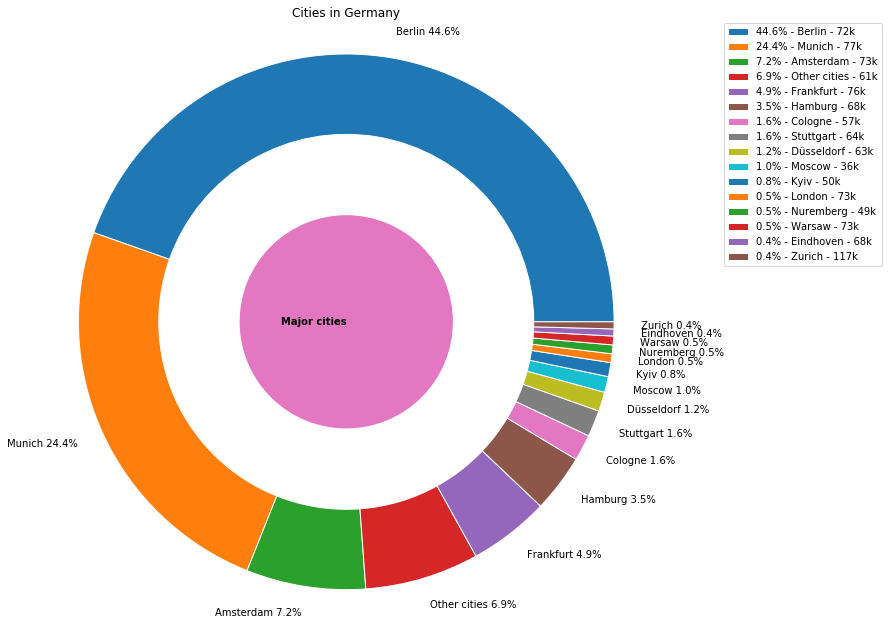

In [364]:

plt.rcParams['figure.figsize'] = [12, 11]
# Make data: I have 3 groups and 7 subgroups
group_names = ['Major cities']
group_size  = [100]

subgroup_names=list(all_cities['city'])
subgroup_size =list(all_cities['count'])
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _= ax.pie(subgroup_size, radius=1.0, labels=['{} {}'.format(*t) for t in zip(subgroup_names,[str(round(x*100/sum(subgroup_size), 1))+'%' for x in subgroup_size])], labeldistance=1.1)
plt.setp(mypie, width=0.3, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie(group_size, radius=1.0-0.6, labels=group_names, labeldistance=0, textprops={'weight': 'bold'})
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)

h,l = zip(*[(h,lab) for h,lab in 
            zip(mypie, ['{} - {}'.format(*t) for t in 
                        zip([str(round(x*100/sum(subgroup_size), 1))+'%' for x in subgroup_size], ['{} - {}'.format(*s) for s in 
                                            zip(all_cities['city'], [str(sum)+'k' for sum in all_cities['mean salary w/o bonus (k)']])])])])
locs = ["upper left", "lower left", "center right"]
ax.legend(h, l, loc="best", bbox_to_anchor=(1.3,1), borderaxespad=0.)

ax.set_title('Cities in Germany')

plt.show()

The most represented cities this year are Berlin, Munich and Amsterdam with 72k, 77k, and 73k average Brutto salaries per year respectively.


<h5 align="left"> 2. Germany</h5>

In [365]:
german_cities = countries[countries['country'] == 'Germany'].sort_values('count', ascending = False)
german_cities.loc[german_cities['count'] < 3, 'city'] = 'Other cities'
german_cities = german_cities.groupby(['city']).agg({"count" : 'sum', "mean salary w/o bonus (k)": 'mean',
                                     "country": 'max',
                                     "region": 'max',
                                     "sub-region": 'max'}).reset_index().sort_values('count', ascending = False)
german_cities["mean salary w/o bonus (k)"] = german_cities["mean salary w/o bonus (k)"].astype(int)

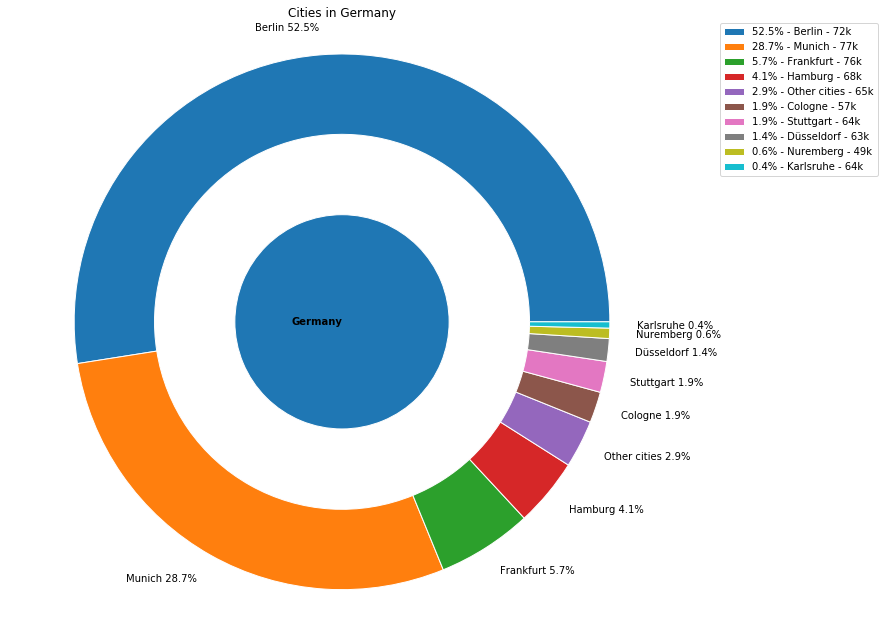

In [366]:
# Libraries

plt.rcParams['figure.figsize'] = [12, 11]
# Make data: I have 3 groups and 7 subgroups
group_names = ['Germany']
group_size  = [802]

subgroup_names=list(german_cities['city'])
subgroup_size =list(german_cities['count'])
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _= ax.pie(subgroup_size, radius=1.0, labels=['{} {}'.format(*t) for t in zip(subgroup_names,[str(round(x*100/sum(subgroup_size), 1))+'%' for x in subgroup_size])], labeldistance=1.1)
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(group_size, radius=1.0-0.6, labels=group_names, labeldistance=0, textprops={'weight': 'bold'})
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)

h,l = zip(*[(h,lab) for h,lab in 
            zip(mypie, ['{} - {}'.format(*t) for t in 
                        zip([str(round(x*100/sum(subgroup_size), 1))+'%' for x in subgroup_size], ['{} - {}'.format(*s) for s in 
                                            zip(german_cities['city'], [str(sum)+'k' for sum in german_cities['mean salary w/o bonus (k)']])])])])
locs = ["upper left", "lower left", "center right"]
ax.legend(h, l, loc="best", bbox_to_anchor=(1.3,1), borderaxespad=0.)

ax.set_title('Cities in Germany')

plt.show()

In Germany Berlin and Munich remain the most represented cities with 72k and 77k average Brutto salaries per year respectively.

<h3 align="left"> 4. Language</h3>
<h5 align="left"> 1. Language per country</h5>

In [367]:
data_ = pd.merge(data[data['City'] != "MA"], countries[['city', 'country']], how='left', left_on='City', right_on='city')
data_.drop(['city'], axis=1, inplace=True)
data_ = data_[data_['Main language at work'].isna() == False]
lang = data_.groupby(['Main language at work', 'country']).size().to_frame().rename(columns={0: "# responses"}).reset_index()

In [368]:
country = lang.groupby(['Main language at work','country']).agg({'# responses': 'sum'}).reset_index()
country.loc[country['# responses'] < 5, 'Main language at work'] = "Other languages"
country.loc[country['# responses'] < 5, 'country'] = "Other countries"

country = country.groupby(['Main language at work','country']).agg({"# responses" : 'sum'}).reset_index().sort_values('Main language at work', ascending = True)
country['percentage'] = [round(x*100/country['# responses'].sum(), 2) for x in country['# responses']]

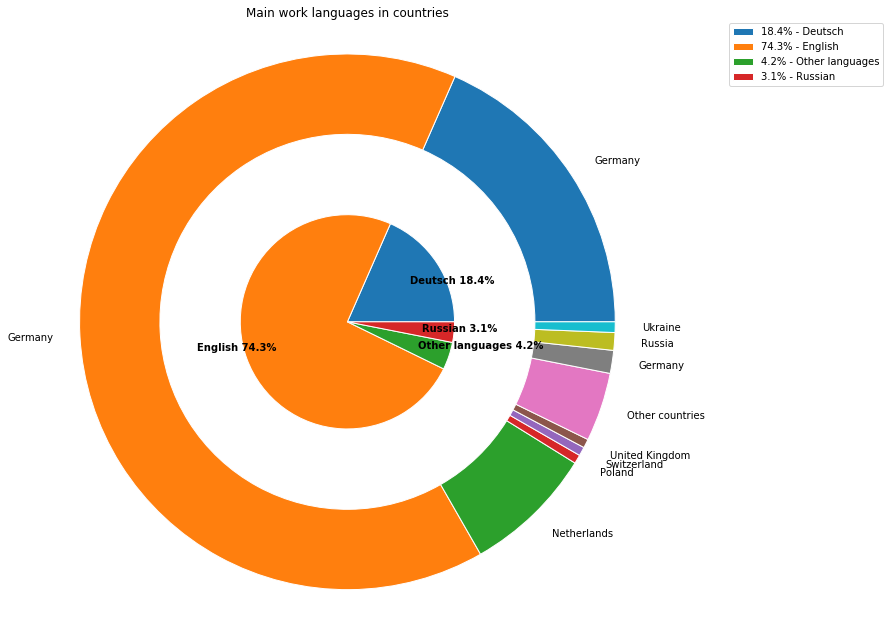

In [369]:
plt.rcParams['figure.figsize'] = [12, 11]
# Make data: I have 3 groups and 7 subgroups
group_names = list(country.groupby(['Main language at work']).agg({"# responses" : 'sum'}).reset_index().sort_values('Main language at work', ascending = True)['Main language at work'])
group_size  = list(country.groupby(['Main language at work']).agg({"# responses" : 'sum'}).reset_index().sort_values('Main language at work', ascending = True)["# responses"])

subgroup_names=list(country['country'])
subgroup_size =list(country['# responses'])
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _= ax.pie(subgroup_size, radius=1.0, labels=subgroup_names, labeldistance=1.1)
plt.setp(mypie, width=0.3, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie(group_size, radius=1.0-0.6, labels=['{} {}'.format(*t) for t in zip(group_names,[str(round(x*100/sum(group_size), 1))+'%' for x in group_size])], 
                   labeldistance=0.7, textprops={'weight': 'bold'})
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)

h,l = zip(*[(h,lab) for h,lab in 
            zip(mypie, ['{} - {}'.format(*t) for t in 
                        zip([str(round(x*100/sum(group_size), 1))+'%' for x in group_size], group_names)])])
locs = ["upper left", "lower left", "center right"]
ax.legend(h, l, loc="best", bbox_to_anchor=(1.3,1), borderaxespad=0.)

ax.set_title('Main work languages in countries')

plt.show()

The majority of respondents working in Germany and Netherlands specified English as their main language at work - 74.3%. ~18% speak german working in german companies. Some respondents work in Germany and use the Russian language at work as main.

<h5 align="left"> 2. Languages per company type in Germany</h5>

In [370]:
data_ = pd.merge(data[data['City'] != "MA"], countries[['city', 'country']], how='left', left_on='City', right_on='city')
data_.drop(['city'], axis=1, inplace=True)
data_ = data_[(data_['Main language at work'].isna() == False) &
              (data_['country'] == 'Germany')]
lang = data_[data_['Main language at work'] != 'English+Deutsch'].groupby(['Main language at work', 'Company size', 'Company type']).size().to_frame().rename(columns={0: "# responses"}).reset_index()
lang['Company type'] = lang['Company type'].str.strip()
lang.loc[lang['Company type'] == 'University Hospital', 'Company type'] = 'University'
a = lang[(lang['Main language at work'] != 'French')].groupby(['Company type', 'Main language at work']).agg({'# responses' : 'sum'}).reset_index()
a = a.pivot(index='Company type', columns='Main language at work').fillna(0)

In [371]:
companies=a.index.to_list()

fig = go.Figure(data=[
    go.Bar(name=a.columns.get_level_values(1).to_list()[0],
           x=companies, 
           y=a.iloc[:,0].to_list()),
    go.Bar(name=a.columns.get_level_values(1).to_list()[1],
           x=companies, 
           y=a.iloc[:,1].to_list()),
    go.Bar(name=a.columns.get_level_values(1).to_list()[2],
           x=companies, 
           y=a.iloc[:,2].to_list())
])
# Change the bar mode
fig.update_layout(barmode='stack',
                 template='plotly_dark',
                 title='Languages per company type in Germany')
fig.update_yaxes(title = '# responses')
py.plot(fig, filename='4_Language_salary_report_2019', auto_open=False)
fig.show()

In German consulting employees speak mostly german, whereas in Product companies and Startup English is considered as the main language.

<h3 align="left"> 5. Salaries</h3>
<h5 align="left"> 1. Salary (EUR/year) vs Total experience (Years)</h5>

In [372]:
data_ = data[(data['Years of experience'] < 50) & 
             (data['Seniority level'] != 'not specified') &
             (data['Seniority level'] != 'Head') &
             (data['Seniority level'] != 'Student') &
             (data['Seniority level'].isna() == False)]

Seniority_level_ = []
sizes = [0.5,1,2.5,3.5,5]
for x in data_['Seniority level']:
    if x == 'Junior':
        Seniority_level_ = Seniority_level_ + [sizes[0]]
    elif x == 'Lead':
        Seniority_level_ = Seniority_level_ + [sizes[3]]
    elif x == 'Middle':
        Seniority_level_ = Seniority_level_ + [sizes[1]]
    elif x == 'Principal':
        Seniority_level_ = Seniority_level_ + [sizes[4]]
    elif x == 'Senior':
        Seniority_level_ = Seniority_level_ + [sizes[2]]
        
data_['Seniority level_'] = Seniority_level_
data_ = data_[(data_['Position (without seniority)'].isna() == False) &
              (~data_['Position (without seniority)'].isin(['CTO (CEO, CFO)', 'Designer (UI, UX)', 'DevOps', 'Head of AI', 
                                              'Head of Engineering', 'Lawyer ', 'Localization', 'Manager',
                                              'Mainframe', 'Modelling Specialist', 'Product Manager', 'QA',
                                              'Recruiter ', 'Scrum Master', 'Support', 'support', 'UX Researcher',
                                              'DevOps Manager', 'SAP Consultant']))].sort_values('Seniority level_', ascending = True)

In [373]:
m = data_["Yearly brutto salary (without bonus and stocks)"].median()
m

70000.0

In [374]:
colorsIdx = {'Junior': 'rgb(158,188,218)', 'Middle': 'rgb(140,150,198)', 'Senior': 'rgb(140,107,177)', 
             'Lead': 'rgb(136,65,157)', 'Principal': 'rgb(110,1,107)'}

fig = px.scatter(data_, x='Years of experience', y="Yearly brutto salary (without bonus and stocks)", 
                 size = 'Seniority level_', 
                 color='Seniority level', 
                 color_discrete_map=colorsIdx,
                 marginal_y="rug",
                 template='plotly_dark'
                )
fig.add_trace(go.Scatter(x=[0,30], 
                         y=[m, m],
                         mode='lines',
                         opacity=0.8,
                         marker=dict(
                            color='gray',
                            line=dict(width=2)),
                         name = 'median = 70k'))

fig.update_traces(marker=dict(line=dict(width=1,
                                        color='white')),
                  opacity=0.9,
                  selector=dict(mode='markers')
                  )

fig.update_yaxes(zeroline=False, showgrid=True,
                 # range=[-5000, 250000], 
                 tickvals=[0, 50000, 70000, 80000, 90000, 100000, 120000, 150000, 200000])

fig.update_layout(title='Salary (EUR/year) vs Total experience (Years) colored by Seniority level, Dev&Tech',
                  yaxis_zeroline=False, xaxis_zeroline=False,
                  showlegend=True, hovermode=False)
py.plot(fig, filename='5_Salaries_DevTech_salary_report_2019', auto_open=False)
fig.show()


48 different job titles appear in the responses. The above scatter is built only based on Developer, Engineer, Data Scientist, and Architect positions (Dev&Tech) excluding Designers, Managers, QA, DevOps, and others. Note the scatter is based on Brutto salaries without bonuses and stocks. 
The median salary of all Dev&Tech positions is 69k, whereas for Middles median is 60k and for Seniors - 75k.

<h5 align="left"> 2. Salary (EUR/year) vs Technology</h5>

In [375]:
tech = data.groupby(['Your main technology / programming language']).agg({"Zeitstempel" : 'count',
                    "Yearly brutto salary (without bonus and stocks)" : 'mean'}).reset_index().rename(columns={'Your main technology / programming language': "technology", 
                                                                                                               'Zeitstempel': "count",
                                                                                                               'Yearly brutto salary (without bonus and stocks)': 'mean salary w/o bonus (k)'})
tech = tech[tech['count'] > 1].reset_index().sort_values('count', ascending = False)
tech['percentage'] = [str(round(x*100/tech['count'].sum(),1)) + '%' for x in tech['count']]


In [376]:
fig = px.bar(tech, x='technology', 
             y='count',
             color='count',
             labels={'count':'# responses'},
             text='percentage',
             template='plotly_dark',
             color_continuous_scale="Portland",
             height = 400)

fig.update_layout(title='Salary (EUR/year) vs Technology colored by Technology',
                  yaxis_zeroline=False, xaxis_zeroline=False)
py.plot(fig, filename='6_Salaries_Tech_salary_report_2019', auto_open=False)
fig.show()

The most common programming language among respondents is Python, the second most - Java.
Under 'Not Relevant' label there are either specialists, which use multiple technologies in their every-day routine or Managers, Designers, QA, which are not bound to any fixed technology.

In [377]:
N = len(tech['technology'])     # Number of boxes

c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]
fig = go.Figure(data=[go.Box(
    y = data[data['Your main technology / programming language'] == tech['technology'][i]]['Yearly brutto salary (without bonus and stocks)'],
    marker_color=c[i],
    text = [tech['technology'][i]], 
    name = tech['technology'][i]
    ) for i in range(int(N))])

# format the layout
fig.update_layout(
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False,
              tickvals = list(tech['technology'])),
    yaxis=dict(zeroline=False, gridcolor='white', tickvals = [0, 30000, 50000, 60000, 70000, 80000, 90000, 100000, 120000, 150000,200000]),
    margin=dict(l=40, r=40, t=20, b=20),
    template='plotly_dark'
)
py.plot(fig, filename='7_Salaries_Tech_box_salary_report_2019', auto_open=False)
fig.show()

25 technologies & programming languages were featured as main by 918 respondents. 25 box plots represent Brutto salary distribution of specialists of a certain technology. For example, the average salary of Google Cloud Engineer engineers (light green roadblock) is superior to other technologies. The yearly salary of Java developers is about 70k, but there are many deviations towards significantly higher salary values. The most represented python specialists are paid around 70k, the salary distribution has the highest standard deviation, which tells about a wide span of salaries.

<h5 align="left"> 3. Distribution of salaries with and without bonuses and stocks in Germany</h5>

In [378]:
data = pd.merge(data[data['City'] != "MA"], countries[['city', 'country']], how='left', left_on='City', right_on='city')


In [379]:
x19_1 = np.asarray(data[(data['Yearly brutto salary (without bonus and stocks)'].isna() == False) &
                        (data['country'] == 'Germany')]['Yearly brutto salary (without bonus and stocks)'])
x19_2 = np.asarray(data[(data['Yearly brutto salary (without bonus and stocks)'].isna() == False) &
                        (data['country'] == 'Germany')]['Yearly brutto salary (without bonus and stocks)'] + data_[(data['Yearly brutto salary (without bonus and stocks)'].isna() == False) &
                        (data['country'] == 'Germany')]['Yearly bonus'].fillna(0))
x19_3 = np.asarray(data[(data['Yearly brutto salary (without bonus and stocks)'].isna() == False) &
                        (data['country'] == 'Germany')]['Yearly brutto salary (without bonus and stocks)'] + data_[(data['Yearly brutto salary (without bonus and stocks)'].isna() == False) &
                        (data['country'] == 'Germany')]['Yearly bonus'].fillna(0) + data[(data['Yearly brutto salary (without bonus and stocks)'].isna() == False) &
                        (data['country'] == 'Germany')]['Yearly stocks'].fillna(0))

x18_1 = np.asarray(data[(data['Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country'].isna() == False) &
                        (data['country'] == 'Germany')]['Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country'])
x18_2 = np.asarray(data[(data['Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country'].isna() == False) &
                        (data['country'] == 'Germany')]['Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country'] + data[(data['Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country'].isna() == False) &
                        (data['country'] == 'Germany')]['Yearly bonus one year ago. Only answer if staying in same country'].fillna(0))
x18_3 = np.asarray(data[(data['Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country'].isna() == False) &
                        (data['country'] == 'Germany')]['Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country'] + data[(data['Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country'].isna() == False) &
                        (data['country'] == 'Germany')]['Yearly bonus one year ago. Only answer if staying in same country'].fillna(0) + data[(data['Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country'].isna() == False) &
                        (data['country'] == 'Germany')]['Yearly stocks one year ago. Only answer if staying in same country'].fillna(0))


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match

In [380]:
plt.rcParams['figure.figsize'] = [12, 6]

fig = make_subplots(rows=3, cols=1,
                    subplot_titles=("Yearly brutto salary + bonus + stocks",
                                    "Yearly brutto salary + bonus", "Yearly brutto salary"),
                    shared_xaxes=True, vertical_spacing=0.09)

y = ['2019']*len(x19_1) + ['2018']*len(x19_1)

fig.add_trace(go.Box(
    x=list(x19_3)+list(x18_3),
    y=y,
    #notched=True,
    name='Yearly brutto salary <br> + bonus + stocks',
    marker_color='#FF851B'),
    row=1, col=1)
fig.add_trace(go.Box(
    x=list(x19_2)+list(x18_2),
    y=y,
    #notched=True,
    name='Yearly brutto salary <br> + bonus',
    marker_color='#FF4136'),
    row=2, col=1)
fig.add_trace(go.Box(
    x=list(x19_1)+list(x18_1),
    y=y,
    #notched=True,
    name='Yearly brutto salary',
    marker_color='#3D9970'),
    row=3, col=1)

fig.update_xaxes(zeroline=False, showgrid=True, dtick=20000, range=[-5000, 250000],
                 tickvals=[0, 20000, 40000, 60000, 70000, 80000, 90000, 100000, 120000, 140000, 160000, 180000, 200000, 220000, 240000],
                 row=3, col=1)
fig.update_xaxes(zeroline=False, showgrid=True, dtick=20000, range=[-5000, 250000], 
                 tickvals=[0, 20000, 40000, 60000, 70000, 80000, 90000, 100000, 120000, 140000, 160000, 180000, 200000, 220000, 240000],
                 row=2, col=1)
fig.update_xaxes(zeroline=False, showgrid=True, dtick=20000, range=[-5000, 250000], 
                 tickvals=[0, 20000, 40000, 60000, 70000, 80000, 90000, 100000, 120000, 140000, 160000, 180000, 200000, 220000, 240000],
                 row=1, col=1)

fig.update_layout(
    title_text="Salary, bonus, stocks per year",
    boxmode='group',
                 template='plotly_dark'
)
fig.update_traces(orientation='h') # horizontal box plots
py.plot(fig, filename='8_Salaries_2018_2019_salary_report_2019', auto_open=False)
fig.show()

801 respondents live in Germany and specified yearly Brutto salary for 2019 year, 503 of them specified their yearly Brutto salary for 2018 year. The above boxplots show distributions of:

* yearly Brutto salaries with bonuses and stocks
* yearly Brutto salaries with bonuses
* yearly Brutto salaries

for 2018 and 2019 years taken from this year's survey (and not from 2018 survey results).
1. Median Brutto salary increased by 5k since last year and become 70k. 
2. The same shift in 5k is in yearly Brutto salaries with bonuses from 2018 to 2019 66k -> 71k.
3. Median yearly Brutto salaries with bonuses and stocks raised from 66k to 72.

However, there are many outliers towards higher values. Congratulations if you are there, great job!
Compared to 2018, in 2019, not only yearly Brutto salaries increased, but also bonuses and stocks.

<h5 align="left"> 4. Brutto salaries in Germany over 2015 - 2019</h5>

In [381]:
x17 = np.asarray(data_2017[(data_2017['Город'].isna() == False) &
                          (data_2017['Город'] != 'Krakow') &
                          (data_2017['Текущая ЗП'].isna() == False)]['Текущая ЗП'])
x16 = np.asarray(data_2016[(data_2016['Город'].isna() == False) &
                          (data_2016['Город'] != 'Unknown') &
                          (data_2016['Текущая ЗП'].isna() == False)]['Текущая ЗП'])
x15 = np.asarray(data_2015[(data_2015['Город'].isna() == False) &
                          (data_2015['Город'] != 'Prague') &
                          (data_2015['Город'] != 'Amsterdam') &
                          (data_2015['Город'] != 'Kharkiv') &
                          (data_2015['Текущая ЗП'].isna() == False)]['Текущая ЗП'])

data_ = pd.merge(data_2018, countries[['city', 'country']], how='left', left_on='City', right_on='city')
data_.City = data_.City.str.strip()
data_.loc[(data_['City'] == 'München'), 'country'] = "Germany"
data_.loc[(data_['City'] == 'Augsburg'), 'country'] = "Germany"
data_.loc[(data_['City'] == 'Regensburg'), 'country'] = "Germany"
data_.loc[(data_['City'] == 'Bonn'), 'country'] = "Germany"
data_.loc[(data_['City'] == 'Köln'), 'country'] = "Germany"
data_.loc[(data_['City'] == 'Baden-Württemberg'), 'country'] = "Germany"
data_.loc[(data_['City'] == 'Frankonia'), 'country'] = "Germany"
data_.loc[(data_['City'] == 'Stuttgart'), 'country'] = "Germany"
data_.loc[(data_['City'] == 'Tübingen'), 'country'] = "Germany"
data_.loc[(data_['City'] == 'Konstanz'), 'country'] = "Germany"
data_.loc[(data_['City'] == 'Oberhausen'), 'country'] = "Germany"
data_.loc[(data_['City'] == 'Andernach'), 'country'] = "Germany"
data_.loc[(data_['City'] == 'Nürnberg'), 'country'] = "Germany"
data_.loc[(data_['City'] == 'Remote Germany'), 'country'] = "Germany"
data_.loc[(data_['City'] == 'Siegen'), 'country'] = "Germany"
data_.loc[(data_['City'] == 'Erlangen'), 'country'] = "Germany"
data_.loc[(data_['City'] == 'Rosenheim'), 'country'] = "Germany"
data_.loc[(data_['City'] == 'Hildesheim'), 'country'] = "Germany"
data_.loc[(data_['City'] == 'Münster'), 'country'] = "Germany"
data_.loc[(data_['City'] == 'Memmingen'), 'country'] = "Germany"
data_.loc[(data_['City'] == 'Essen'), 'country'] = "Germany"
data_.loc[(data_['City'] == 'Ludwigsburg'), 'country'] = "Germany"
data_.loc[(data_['City'] == 'Bitburg'), 'country'] = "Germany"
data_.loc[(data_['City'] == 'Mannheim'), 'country'] = "Germany"
data_.loc[(data_['City'] == 'bremen'), 'country'] = "Germany"

data_.drop(['city'], axis=1, inplace=True)
data_[data_['country'] == 'Germany']

x18 = np.asarray(data_[(data_['country'] == 'Germany') &
                       (data_['Current Salary'].isna() == False)]['Current Salary'])

In [382]:
# Group data together
hist_data = [x19_1, x18, x17, x16, x15]

group_labels = ['2019', '2018', '2017', '2016', '2015']
colors = cl.scales['7']['seq']['BuPu'][:5]

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=5000, show_hist=False, colors=colors)

fig.update_xaxes(zeroline=False, 
                 showgrid=True, 
                 dtick=10000, 
                 range=[-5000, 160000], 
                 tickvals=[0, 20000, 30000, 40000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000, 90000, 100000, 120000, 140000, 160000, 180000, 200000, 220000, 240000],
                 )
fig.update_yaxes(zeroline=False, 
                 showgrid=True)

fig.update_layout(template='plotly_dark', 
                  title = 'Distributions of Brutto salaries in Germany over 2015 - 2019')
py.plot(fig, filename='9_Salaries_brutto_2015_2019_report_2019', auto_open=False)
fig.show()

In Germany the distribution of yearly salaries from 2015 is concentrated around 52k, 2016 - 60k.
2017, 2018, 2019 years distributions are different by the higher standard deviation, which may evidence a more diverse audience participated in the survey every new year.
Every year the peak of distribution constantly moves to the right -> the common salary of respondents from Germany was growing by 1-2k from 2017 until 2019.
Curve of 2019 is right-skewed and above all other curves on the right side of distribution. It indicates more respondents, whose salaries are near or above 100k per year.

<h5 align="left"> 5. Salaries in the most represented cities of 2019 survey</h5>

In [383]:
Berlin = list(data[(data['City'] == 'Berlin') & 
     (data['Yearly brutto salary (without bonus and stocks)'].isna() == False)]['Yearly brutto salary (without bonus and stocks)'])
Munich = list(data[(data['City'] == 'Munich') & 
     (data['Yearly brutto salary (without bonus and stocks)'].isna() == False)]['Yearly brutto salary (without bonus and stocks)'])
Amsterdam = list(data[(data['City'] == 'Amsterdam') & 
     (data['Yearly brutto salary (without bonus and stocks)'].isna() == False)]['Yearly brutto salary (without bonus and stocks)'])
Hamburg = list(data[(data['City'] == 'Hamburg') & 
     (data['Yearly brutto salary (without bonus and stocks)'].isna() == False)]['Yearly brutto salary (without bonus and stocks)'])
Frankfurt = list(data[(data['City'] == 'Frankfurt') & 
     (data['Yearly brutto salary (without bonus and stocks)'].isna() == False)]['Yearly brutto salary (without bonus and stocks)'])


In [384]:
import plotly.figure_factory as ff

# Group data together
hist_data = [Berlin, Munich, Amsterdam, Hamburg, Frankfurt]

group_labels = ['Berlin', 'Munich', 'Amsterdam', 'Hamburg', 'Frankfurt']
colors =       ['red',    'blue',   'green',     'orange',  'purple']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=5000, show_hist=False, colors=colors)

fig.update_xaxes(zeroline=False, 
                 showgrid=True, 
                 dtick=10000, 
                 range=[30000, 180000], 
                 tickvals=[40000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000, 90000, 
                           100000, 120000, 140000, 160000, 170000, 180000],
                 )
fig.update_yaxes(zeroline=False, 
                 showgrid=True)
fig.update_layout(template='plotly_dark',
                  title = 'Salaries in the most represented cities of 2019 survey')
                  
py.plot(fig, filename='10_Salaries_cities_2019_salary_report_2019', auto_open=False)
fig.show()

As in 2018, in 2019 salaries in Berlin and Munich are aligned again for the majority of respondents (421 from Berlin, 230 from Munich). Shapes of distributions are almost the same except a bump at around 120k for respondents from Munich. According to respondents, the common salary in Hamburg as of 2019 is lower than in the other 4 cities. Although in Frankfurt the average salary is around 76k, the common salary is around 65k (lower than in Munich and Berlin). The green curve corresponding to Amsterdam shows the highest common salaries in the range of 68-75.

<h5 align="left"> 6. Middles vs. Seniors / Berlin vs. Munich</h5>

In [390]:
data_ = data[((data['Seniority level'] == 'Middle') & (data['City'] == 'Berlin')) |
             ((data['Seniority level'] == 'Senior') & (data['City'] == 'Berlin')) |
             ((data['Seniority level'] == 'Junior') & (data['City'] == 'Berlin')) |
             ((data['Seniority level'] == 'Middle') & (data['City'] == 'Munich')) |
             ((data['Seniority level'] == 'Senior') & (data['City'] == 'Munich')) |
             ((data['Seniority level'] == 'Junior') & (data['City'] == 'Munich'))][data['Yearly brutto salary (without bonus and stocks)']>100]


In [391]:
fig=px.histogram(data_, 
                   x='Yearly brutto salary (without bonus and stocks)', 
                   color='Seniority level', 
                   facet_row='City', 
                   nbins=85,
                   opacity = 0.5, 
                   template='plotly_dark')
fig.update_layout(barmode='overlay')
fig.update_xaxes(zeroline=False, 
                 showgrid=True, 
                 tickvals=[0, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 120000, 140000, 160000, 180000, 200000, 220000, 240000],
                 )
py.plot(fig, filename='11_Salaries_Seniority_level_salary_report_2019', auto_open=False)
fig.show()

As has been shown above the salaries in Berlin and Munich are not very different. According to the senior respondents, a yearly salary is between 60k and 100k in both cities. A middle in Berlin gets paid up to 80k, whereas in Munich up to 75k. 